In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


In [3]:
pd.options.display.max_columns=50
sn.set(style="whitegrid", rc={"axes.facecolor":"#CAF1DE"})

# Loading the dataset
# First we need a frame for our dataset such as df

In [21]:

df = pd.read_csv('bse_dataset.csv')
df

,Timestamp,What is your gender?,Age,What is your emotion?,Year of birth,What is your CGPA?,Do you have a Girl Friend or BOY Friend,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you have seek any specialist for a treatment?
0,05/07/2023 09:38:39,Male,21.0,Content,2002,4.22,No,No,Yes,Yes,Yes
1,05/07/2023 09:38:57,Marabou stock,45.0,Weird,2100,8.9,Yes,Yes,Yes,Yes,No
2,05/07/2023 09:39:09,Female,20.0,Happy,2002,3.98,No,No,Yes,Yes,No
3,05/07/2023 09:39:12,Male,21.0,Happy,2003,4.37,No,No,No,No,Nope
4,05/07/2023 09:39:14,Female,21.0,Happy,2002,3.63,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
92,05/07/2023 09:53:56,Female,68.0,Sad,1953,4.8,No,Yes,Yes,Yes,Yes
93,05/07/2023 09:54:13,Male,29.0,Hopeful,1994,I don't know yet,"Sure, multiple girlfriends",No,No,No,No
94,05/07/2023 09:54:28,Male,22.0,Fighting poverty,2001,3.12,Girl friends are thieves,Yes,Yes,No,No
95,05/07/2023 09:54:36,Male,23.0,good and bad,2000,3.5,Namiiro Zahara Bidin,No,No,No,No


# Preprocessing
# Data Analysis workflow
# Here we need to understand our dataset ie Preparation
# Data Cleaning - Data cleaning, wrong data, wrong format, null values, duplicate values
# Explatory data analysis(EDA)
# Insight Data Visualisation

# Understanding of data structures
# Checking shape of data - understanding rows and columns

In [ ]:
df.shape

(97, 11)

# need to know the column names


In [15]:
df.columns


Index(['Timestamp', 'What is your gender?', 'Age', 'What is your emotion?',
       'Year of birth', 'What is your CGPA?',
       'Do you have a Girl Friend or BOY Friend', 'Do you have Depression?',
       'Do you have Anxiety?', 'Do you have Panic attack?',
       'Did you have seek any specialist for a treatment? '],
      dtype='object')

# Check For basic information

In [22]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 11 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Timestamp                                           97 non-null     object 
 1   What is your gender?                                97 non-null     object 
 2   Age                                                 95 non-null     float64
 3   What is your emotion?                               96 non-null     object 
 4   Year of birth                                       97 non-null     object 
 5   What is your CGPA?                                  97 non-null     object 
 6   Do you have a Girl Friend or BOY Friend             97 non-null     object 
 7   Do you have Depression?                             97 non-null     object 
 8   Do you have Anxiety?                                97 non-null     object 
 9   D

# Check null values

In [23]:

df.isnull().sum().sort_values(ascending=False)

Age                                                   2
What is your emotion?                                 1
Timestamp                                             0
What is your gender?                                  0
Year of birth                                         0
What is your CGPA?                                    0
Do you have a Girl Friend or BOY Friend               0
Do you have Depression?                               0
Do you have Anxiety?                                  0
Do you have Panic attack?                             0
Did you have seek any specialist for a treatment?     0
dtype: int64

# check Data types

In [24]:

df.dtypes

Timestamp                                              object
What is your gender?                                   object
Age                                                   float64
What is your emotion?                                  object
Year of birth                                          object
What is your CGPA?                                     object
Do you have a Girl Friend or BOY Friend                object
Do you have Depression?                                object
Do you have Anxiety?                                   object
Do you have Panic attack?                              object
Did you have seek any specialist for a treatment?      object
dtype: object

# Check null values in percentage

In [27]:

for i in df.columns:
    if df[i].isnull().any():
        print(i, "....", df[i].isnull().sum()*100/df.shape[0], "%")
        

Age .... 2.0618556701030926 %
What is your emotion? .... 1.0309278350515463 %


<AxesSubplot:>

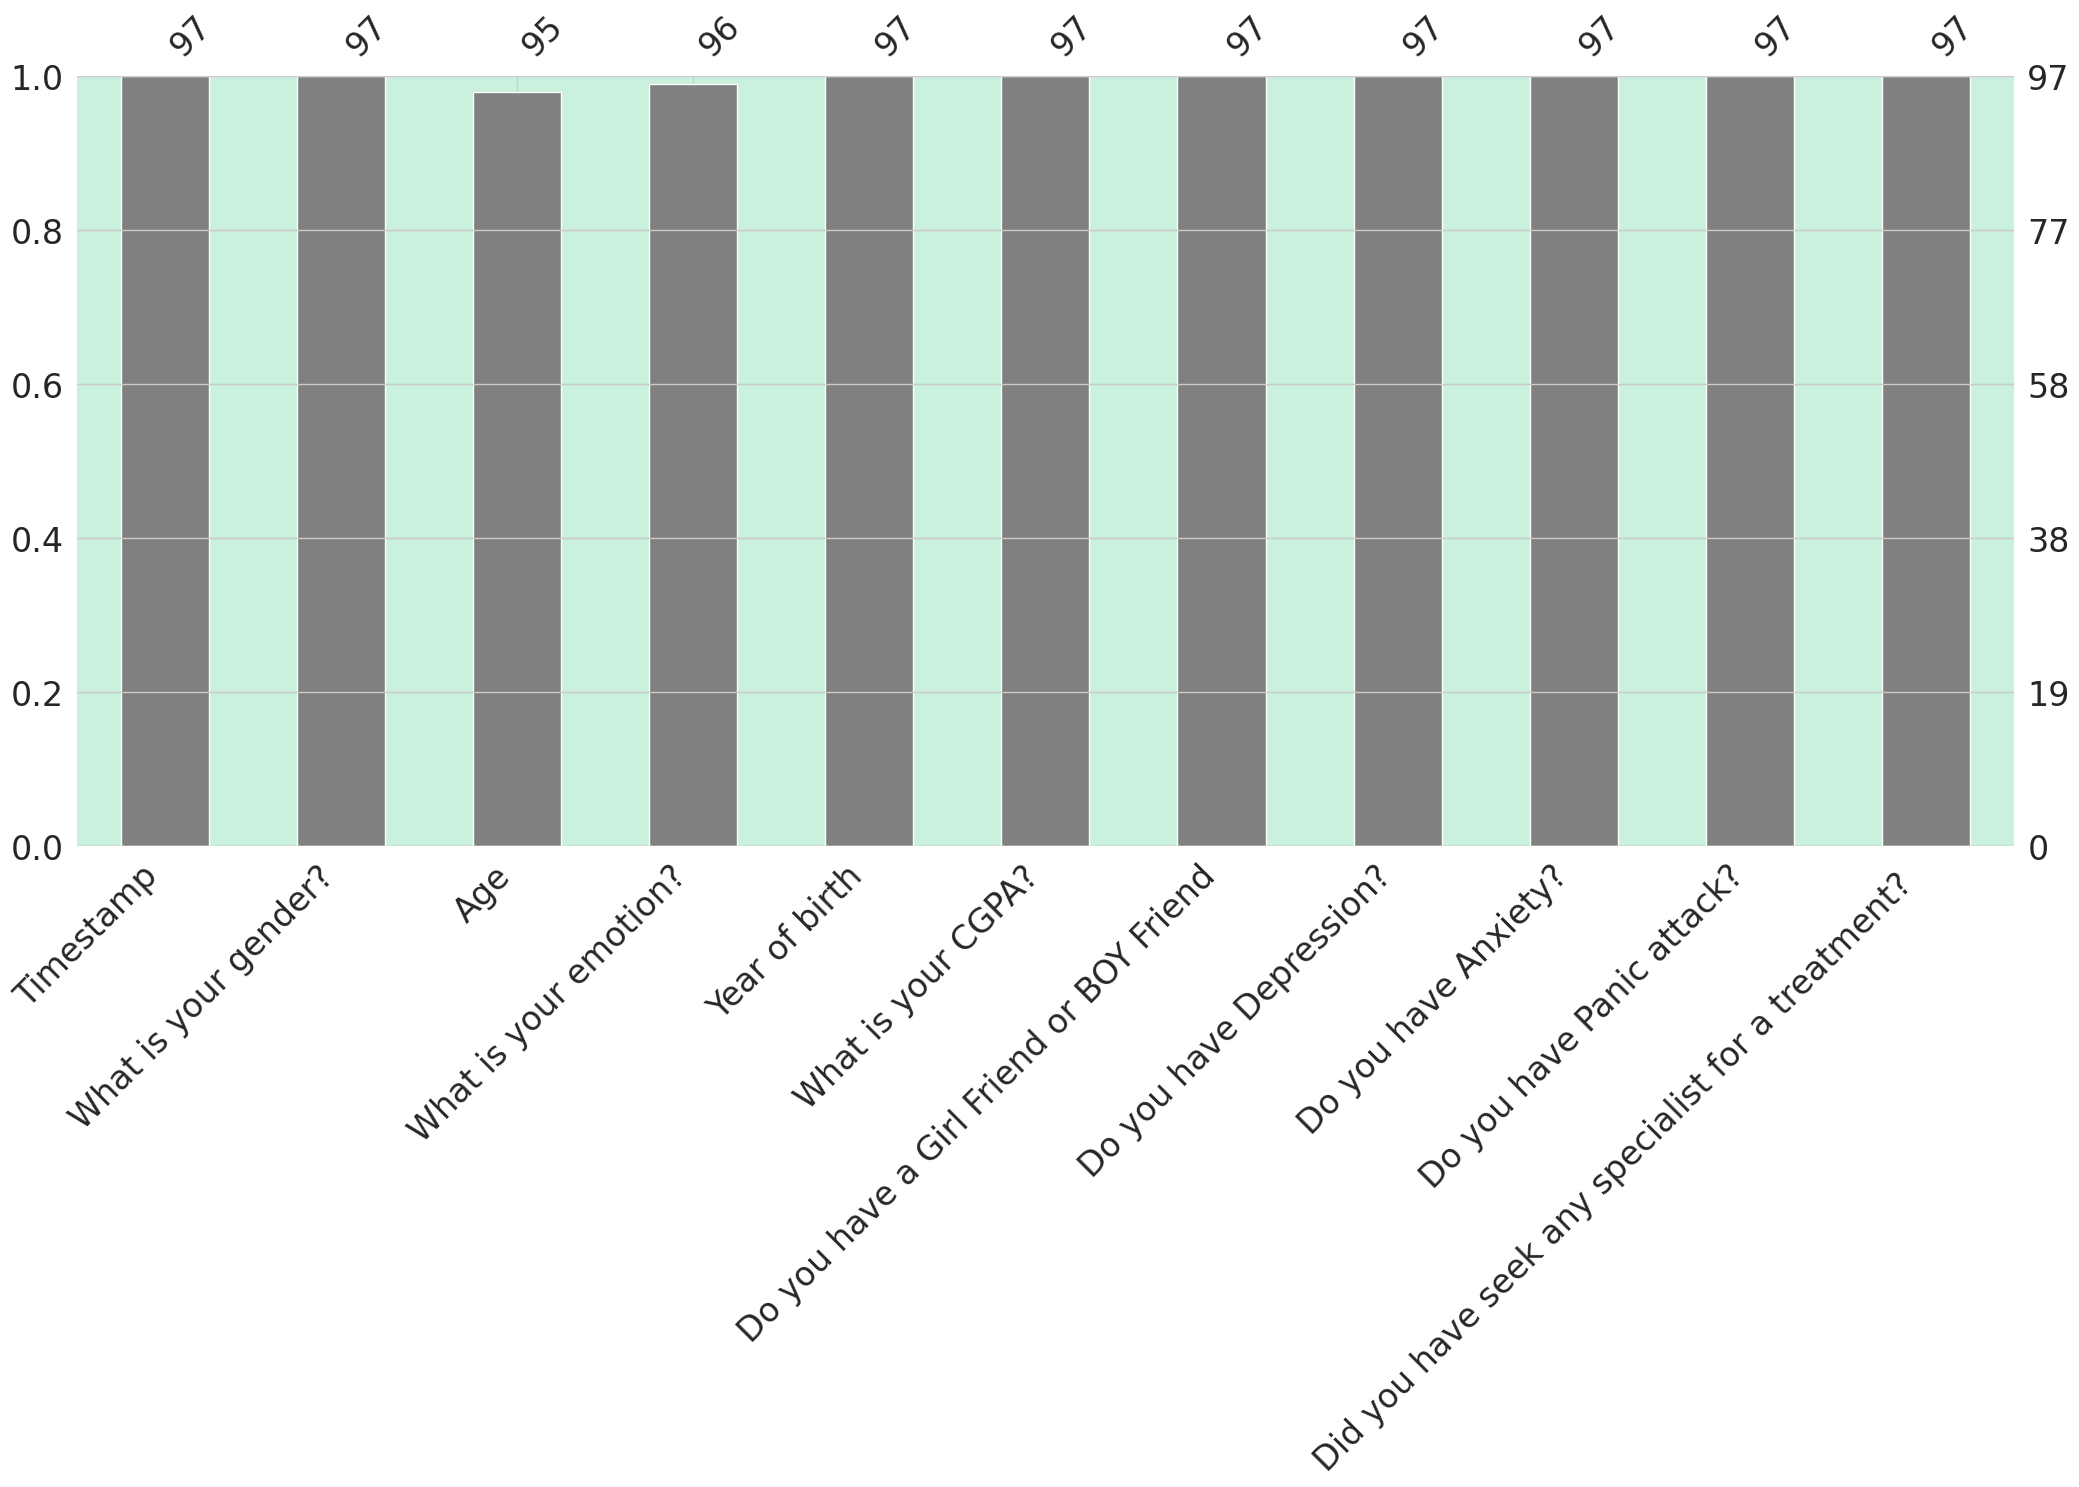

In [30]:
import missingno as msno
msno.bar(df, color = "gray", fontsize=24)


# Check For Duplicates

In [31]:
df.duplicated().sum()

0

# Describe() statistical details about your data

In [33]:
df.describe(include="object").T

,count,unique,top,freq
Timestamp,97,90,05/07/2023 09:40:42,2
What is your gender?,97,10,Male,41
What is your emotion?,96,50,Happy,16
Year of birth,97,18,2002,36
What is your CGPA?,97,61,3.5,7
Do you have a Girl Friend or BOY Friend,97,14,No,37
Do you have Depression?,97,13,No,47
Do you have Anxiety?,97,18,No,38
Do you have Panic attack?,97,13,No,43
Did you have seek any specialist for a treatment?,97,9,No,44


# Check Unique Values

In [34]:
for i in df.columns:
    print(i, "----", df[i].unique())

Timestamp ---- ['05/07/2023 09:38:39' '05/07/2023 09:38:57' '05/07/2023 09:39:09'
 '05/07/2023 09:39:12' '05/07/2023 09:39:14' '05/07/2023 09:39:20'
 '05/07/2023 09:39:21' '05/07/2023 09:39:23' '05/07/2023 09:39:26'
 '05/07/2023 09:39:27' '05/07/2023 09:39:28' '05/07/2023 09:39:33'
 '05/07/2023 09:39:38' '05/07/2023 09:39:40' '05/07/2023 09:39:45'
 '05/07/2023 09:39:46' '05/07/2023 09:39:47' '05/07/2023 09:39:49'
 '05/07/2023 09:39:50' '05/07/2023 09:39:54' '05/07/2023 09:39:56'
 '05/07/2023 09:40:00' '05/07/2023 09:40:01' '05/07/2023 09:40:02'
 '05/07/2023 09:40:08' '05/07/2023 09:40:10' '05/07/2023 09:40:12'
 '05/07/2023 09:40:13' '05/07/2023 09:40:16' '05/07/2023 09:40:25'
 '05/07/2023 09:40:26' '05/07/2023 09:40:27' '05/07/2023 09:40:33'
 '05/07/2023 09:40:34' '05/07/2023 09:40:40' '05/07/2023 09:40:42'
 '05/07/2023 09:40:46' '05/07/2023 09:40:47' '05/07/2023 09:40:54'
 '05/07/2023 09:40:59' '05/07/2023 09:41:00' '05/07/2023 09:41:01'
 '05/07/2023 09:41:05' '05/07/2023 09:41:06' '0